# The noisy case

In [1]:
#libraries maths
import math
import scipy
import numpy  as np
import pandas as pd
from ripser        import Rips
from scipy.spatial import  distance_matrix
from fermat        import Fermat

#libraries matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri    as tri 
from   mpl_toolkits.mplot3d import Axes3D 
from   matplotlib           import animation, rc

#libraries display
import sys
from IPython.display import HTML
from IPython.display import clear_output

#library with specific functions
from utils import *

## The dataset

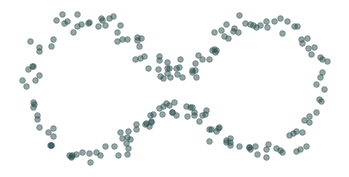

In [2]:
#E_noisy = generateEyeglasses(N_signal = 200, l=0.5, sd = 0.3)
E_noisy = np.loadtxt('data/Eyeglasses_noisy.txt')
plt.figure(figsize=(6,3))
plt.scatter(E_noisy[:,0], E_noisy[:,1], s=30, alpha = 0.5, color = 'darkslategrey');
plt.axis('off');

In [49]:
#np.savetxt('data/Eyeglasses_noisy.txt', E_noisy)

## Persistence diagrams with respect to different input distances

In [13]:
rips = Rips(maxdim = 1)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


### 1.Euclidean Distance

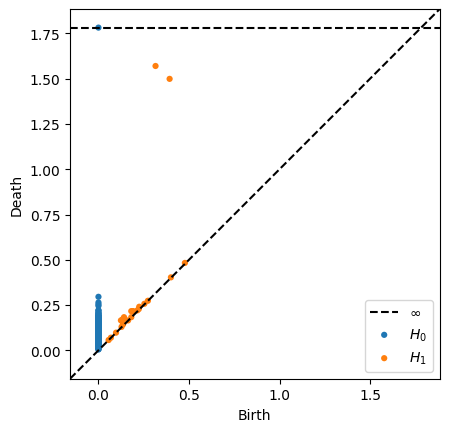

In [14]:
dgms = rips.fit_transform(E_noisy)
rips.plot(dgms);

### 2.The estimator of the inherited geodesic distance

- #### Parameter $\varepsilon=0.2$

Persistence diagram


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


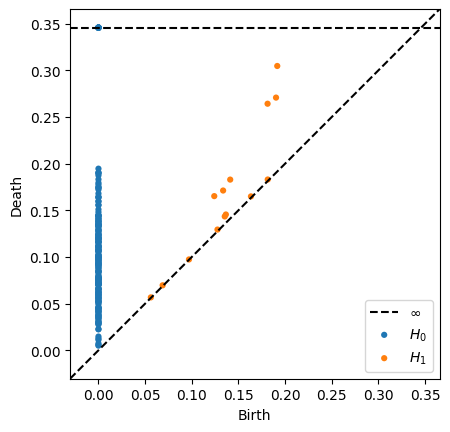

In [12]:
D = compute_eps_geodesic_distance(E_noisy, eps = 0.2)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

$\varepsilon$-graph

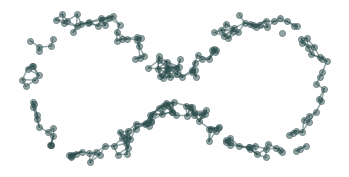

In [6]:
plotEpsGraph(E_noisy, 0.2, (6,3))

- #### Parameter $\varepsilon=0.3$

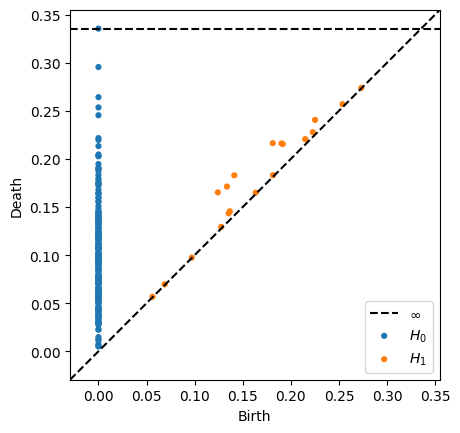

In [22]:
D = compute_eps_geodesic_distance(E_noisy, eps = 0.3)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

$\varepsilon$-graph

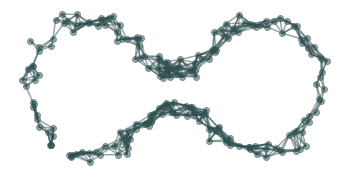

In [7]:
plotEpsGraph(E_noisy, 0.3, (6,3))

- #### Parameter $\varepsilon=0.4$

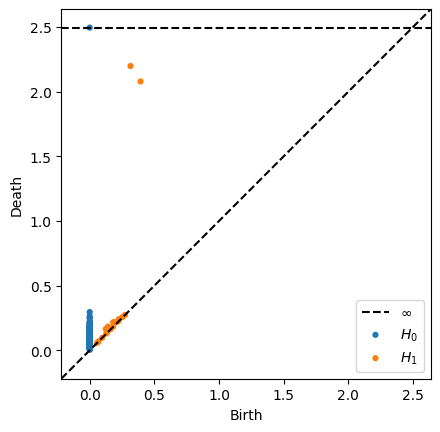

In [30]:
D = compute_eps_geodesic_distance(E_noisy, eps = 0.4)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

$\varepsilon$-graph

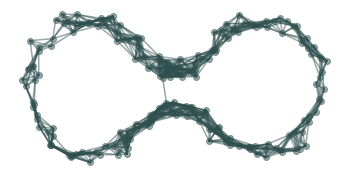

In [5]:
plotEpsGraph(E_noisy, 0.4, (6,3))

### 3.Fermat Distance

- #### Parameter p=3

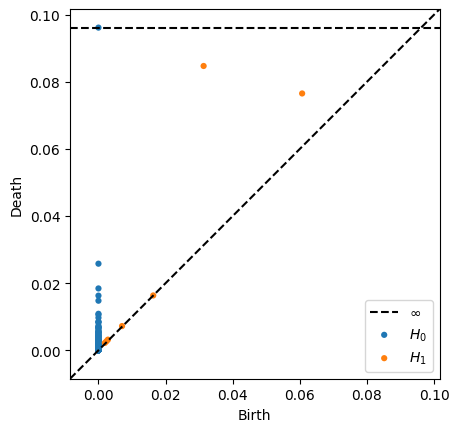

In [27]:
D = compute_fermat_distance(E_noisy, p=3)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

- #### Parameter p=3.5

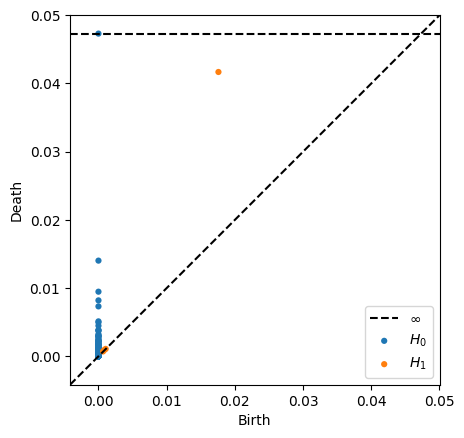

In [24]:
D = compute_fermat_distance(E_noisy, p=3.5)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

- #### Parameter p=4

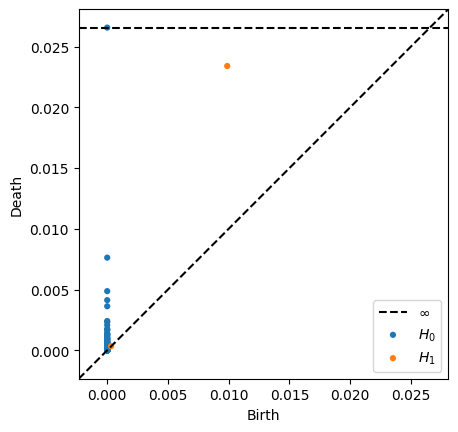

In [25]:
D = compute_fermat_distance(E_noisy, p=4)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

- #### Parameter p=5

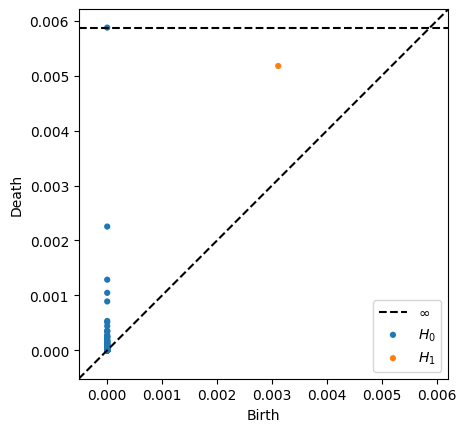

In [26]:
D = compute_fermat_distance(E_noisy, p=5)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

## Animations for Vietoris-Rips filtrations

In [8]:
'The dataset'

X=E_noisy

In [37]:
'Video parameters'

FPS = 3                      #frames per second
DPI = 200                    #quality of the video
time = 10                    #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,1,number_frames)    #radii used in the filtration

In [9]:
'Animation for the Rips filtration'

def animationRips(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    ax.axis('off')
    r = radii[i]
        
    #plot the points 
    for j in range(np.shape(X)[0]):
        point = plt.Circle((X[j,0], X[j,1]), .03, facecolor='darkslategrey', edgecolor = 'darkslateblue', alpha = 0.7)
        ax.add_artist(point)
    
    #plot edges 
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            if distance[j,k]<2*r:
                plt.plot([X[j,0], X[k,0]], [X[j,1], X[k,1]], c = 'darkslategrey', alpha = 0.1)
    
    #plot triangles
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            for t in range(k, np.shape(X)[0]):
                if (distance[j,k]<2*r)&(distance[j,t]<2*r)&(distance[k,t]<2*r):
                    triangle = plt.Polygon([X[j,:], X[k,:], X[t,:]], color='indianred', alpha = 0.05)
                    ax.add_artist(triangle)
        
    ax.set_xlim(-2.5,2.5)
    ax.set_ylim(-1.2,1.2)

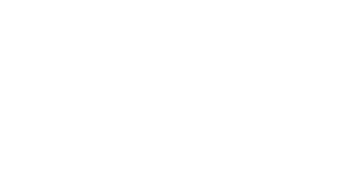

In [10]:
fig = plt.figure( figsize=(6,3));  
ax = fig.add_subplot(1, 1, 1);         
ax.set_xlim(-2.5,2.5);
ax.set_ylim(-1.2,1.2);
ax.axis('off');
fig.add_axes(ax);

### 1.Euclidean distance

In [49]:
distance = distance_matrix(X, X)
anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)


In [91]:
HTML(anim.to_html5_video())

In [32]:
#anim.save('animations/filtration_noisy_eyeglasses_euclidean.gif',writer='imagemagick',fps=FPS, dpi = DPI)

### 2.Inherited geodesic distance

In [40]:
distance = compute_eps_geodesic_distance(X, 0.3)

anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

In [77]:
HTML(anim.to_html5_video())

In [33]:
#anim.save('animations/filtration_noisy_eyeglasses_geodesic_0.3.gif',writer='imagemagick',fps=FPS, dpi = DPI)

### 3. Fermat distance

In [11]:
'Video parameters'

FPS = 2                      #frames per second
DPI = 100                    #quality of the video
time = 5                     #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,0.03,number_frames)    #radii used in the filtration

In [12]:
distance = compute_fermat_distance(X, 4)

anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

In [ ]:
HTML(anim.to_html5_video())

Iteration 4 over 10.
